<a href="https://colab.research.google.com/github/JadonTelep/MAT-421/blob/main/SP_24_MAT_421_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discovering Related Pathologies For Lower Back Pain

## Introduction

Lower back pain is a cause for discusion, as age relaited degeneration of the muscles affects all people leading to loss of activity and function later in life. Over time this degeneration leads to major disability inluding a reduction of daily life activities, work ability, and sexual function (Grabovac and Dorner).

Much of this pain is sourced around the spine, sacroiliac joints, and hips(Shemshaki et al.), which do the job of stablizing and supporting the trunk and reduce the distribution of force loads from the lower extremities. This brings concern as to everyday activities and life styles that put additional or dangrous loads on the spin, joints, and hips. The skeletal parts of the spine and hips are cushioned by disks and cartilage that are particularly at risk for acute and chronic damage, and constant preassure brough about by gravity and every day activities have an effect on the ability of these areas.

The International Journal of Environmental Research and Public Health released a review of 26,926 surveys to associations between spinal pain and chronic health conditions and investigated the influence that a set of confounders may have on the associations between spinal pain and chronic health conditions. They found 4 particualar chronic health conditions that significantly increased the prevalence odds of spinal pain: cardiovascular conditions, hypertension, diabetes, and obesity, controlling for all the confounders (De Luca et al.). In a different study, they found that weight gain was significantly associated with LBP compared with no weight change. Weight gain of ≥6 kg was particularly closely associated with LBP, compared with no weight change (Lee et al.). A study done by Medicine (Baltimore) found that low back pain was associated with higher body mass index and and waist-hip ratio with increased tendency toward having a higher fat mass index, but not fat-free mass index(Chou et al.). All studies indicate some or direct relationships between the effects of superflous amounts of fat in the body and lower back pain.



## Theory

As much of the data collected from the survey was either binary or categorical data, feature analysis using apriori algorithm was done to compare various features with lower back pain."Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis" (Wiki).

Logistic regression and linear regression models were created to indicate any relationship between features that were associated with lower back pain. A logisitic model was used as the target was collected by a binary; however, a linear model was also used to contrast the logistic model. Ideally, a logistic model could be used to classify when a feature crossed a particular threshold that be indicate when an adult would start to experience lower back pain. Logistic models remain at 0 when tending towards -∞ and 1 when tending towards ∞, crossing over from 0 to 1 at a particular x-corrdinatem making it particualary potent for classification.  

## Implementation

In [406]:
from google.colab import files
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = []
df.append(pd.read_csv('/content/samadult_2018.csv'))
df.append(pd.read_csv('/content/samadult_2017.csv'))
df.append(pd.read_csv('/content/samadult_2016.csv'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The data was collected from 3 different spread sheets for each years collection of surveys.

In [407]:
comp_df = pd.concat([df[0], df[1], df[2]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The data was concatenated together into one `DataFrame`, `comp_df`.

In [408]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81617 entries, 0 to (1, 1, 71579, 4, 7129.4, 7467, 1, 12, 1, 1, 1, 1, 54, 30, 2016, 11, 3, 106, 22, nan, nan, 2, 2, 3, 1, 1, nan, nan, 2.0, 1.0, nan, 3.0, 1.0, 1.0, 1.0, 2.0, 0, 24.0, 5.0, 11.0, 4.0, 18.0, nan, 1, 1.0, 1.0, 1.0, 2, nan, nan, nan, 2, 2, 2, 2, 2, 2, 2, 2.0, nan, nan, 2.0, 2, nan, nan, nan, 2, nan, 2, 2, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2, 2, 2, 2, 2, 2, 9, 2, 2.0, 4.0, nan, nan, nan, nan, nan, nan, nan, nan, 2.0, 2.0, 3.0, 2, 2, 2, 2, 2, 2, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 2, nan, 2, 2, nan, 2, 2, 2, 2, nan, nan, 2, 2.0, 2, 2, nan, 2, nan, 2, nan, nan, 2, nan, 2, nan, 1.0, 1.0, 2.0, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4, 2, nan, 2, 2, 1.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [409]:
comp_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,...,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269
0,1.0,1.0,1.0,1.0,4228.8,3915.0,2.0,12.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,6.0,1.0,14650.9,16978.0,1.0,12.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,8.0,1.0,7066.1,10385.0,1.0,12.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,9.0,1.0,4497.5,3958.0,1.0,12.0,4.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,10.0,1.0,5594.0,6483.0,1.0,12.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`comp_df` contains the 81617 surveys from 2016 to 2018. Most questions from the surveys were used in each years surveys so there is much overlay of features over the 3 years the surveys were collect. All entries are floats. Most categorical data was binary with yes answers being tagged as a 1 and no answers being tagged as a 2. Other numbers were used to not answer the specific question: 7 for refused, 8 not ascertained, 9 don't know. The FPX, FMX, and HHX features are used for identifying particular entries. No one entry should have all three be the same.

In [410]:
comp_df.drop(['SRVY_YR', 'WTIA_SA', 'WTFA_SA', 'INTV_QRT'], axis=1)
demo_features = comp_df[['SEX', 'HISPAN_I', 'MRACRPI2', 'RACERPI2', 'MRACBPI2']]
cat_features = comp_df[['HYPEV','CHLEV', 'CHDEV', 'ANGEV', 'MIEV', 'HRTEV', 'STREV', 'EPHEV', 'COPDEV', 'CANEV','DIBEV1', 'JNTSYMP', 'ARTH1', 'AFLHC29_', 'AFLHC30_', 'PAINLB']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Features were specifically selected from the surveys in order to create a wide range for the categorical features. Each feature was tagged with a particalur ID that can be referenced using the Variable Summary or Variable Layout provided with the data set from the NCHS.

In [411]:
def clean_df(unclean_df):
  unclean_df = unclean_df[unclean_df['PAINLB'] == 1].drop('PAINLB', axis=1)
  unclean_df = unclean_df.replace({2: 0, 3: 0, 7: 0, 8: 0, 9: 0})
  clean_df = unclean_df.replace(np.NaN, 0)
  clean_df = clean_df.drop_duplicates()
  print(clean_df.info())
  return clean_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Basic preprocessing was done to allow frequent item analysis. Of the data that was tagged as a 2, the id was changed to a 0 for a false identifier. Any data that was unaswered or tagged as unsure, was changed to a 0 as well. `drop_duplicates` was ran to remove any duplicates.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
Index: 1369 entries, 2 to 26728
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HYPEV     1369 non-null   float64
 1   CHLEV     1369 non-null   float64
 2   CHDEV     1369 non-null   float64
 3   ANGEV     1369 non-null   float64
 4   MIEV      1369 non-null   float64
 5   HRTEV     1369 non-null   float64
 6   STREV     1369 non-null   float64
 7   EPHEV     1369 non-null   float64
 8   COPDEV    1369 non-null   float64
 9   CANEV     1369 non-null   float64
 10  DIBEV1    1369 non-null   float64
 11  JNTSYMP   1369 non-null   float64
 12  ARTH1     1369 non-null   float64
 13  AFLHC29_  1369 non-null   float64
 14  AFLHC30_  1369 non-null   float64
dtypes: float64(15)
memory usage: 171.1+ KB
None
     support          itemsets
0   0.669832           (HYPEV)
5   0.655953         (JNTSYMP)
6   0.623813           (ARTH1)
1   0.601899           (CHLEV)
12  0.455077  (JNTSYMP, ARTH1)

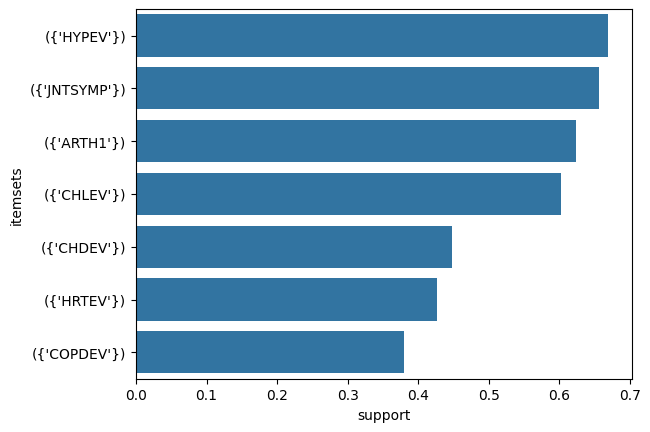

In [412]:
from mlxtend.frequent_patterns import apriori

def freq_anlys(test_df):
  frequent_itemsets = apriori(test_df, min_support=0.37, use_colnames=True).sort_values(by=['support'], ascending=False)
  frequent_itemsets_str = frequent_itemsets.copy()
  frequent_itemsets_str['itemsets'] = frequent_itemsets_str['itemsets'].astype(str)
  frequent_itemsets_str['itemsets'] = frequent_itemsets_str['itemsets'].str.replace('frozenset', '')
  print(frequent_itemsets)
  sns.barplot(x='support', y='itemsets', data=frequent_itemsets_str[frequent_itemsets_str['itemsets'].str.contains(",") == False ])

clean_dat_features = clean_df(cat_features)
freq_anlys(clean_dat_features)

After preprocessing, 16,222 surveys were analyzed using Apriori's Algorithm. Of those adults who experienced lower back pain for a period of at least 3 months, 60% had some other symptoms of joint pain/aching/stiffness past 30 days, 47% had been told they had arthritis, 46% had been told they had hypertension, 40% had been told they had high cholestrol, and 39% had some other symptoms of joint pain/aching/stiffness past 30 days and had been told they had arthritis. Other categories showed insignificant. Hypertension and choronary disease went over further review to identify the severity of these in adults who experienced such hypertension and choronary disease.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 3 to 427
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HYPDIFV   9 non-null      float64
 1   HYPYR1    9 non-null      float64
 2   HYPMDEV2  9 non-null      float64
 3   HYPMED2   9 non-null      float64
dtypes: float64(4)
memory usage: 360.0+ bytes
None
    support             itemsets
0  0.666667            (HYPDIFV)
1  0.666667           (HYPMDEV2)
2  0.444444  (HYPMDEV2, HYPDIFV)


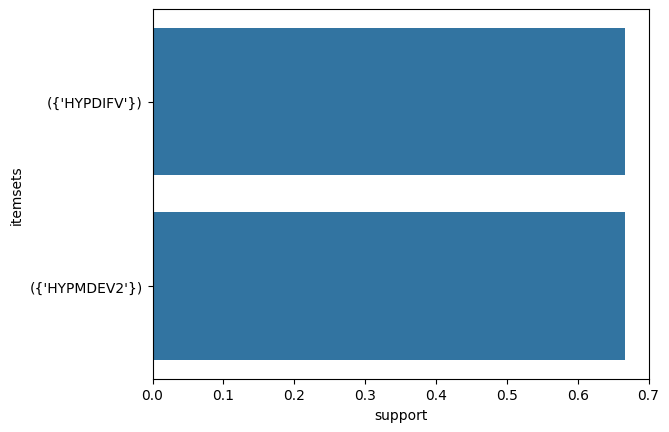

In [413]:
hyp_features = comp_df[['HYPEV', 'HYPDIFV', 'HYPYR1', 'HYPMDEV2', 'HYPMED2', 'PAINLB']]
hyp_features = hyp_features[hyp_features['HYPEV'] == 1].drop('HYPEV', axis=1)
clean_hyp_features = clean_df(hyp_features)
freq_anlys(clean_hyp_features)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 3 to 402
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CHLYR     6 non-null      float64
 1   CHLMDEV2  6 non-null      float64
 2   CHLMDNW2  6 non-null      float64
dtypes: float64(3)
memory usage: 192.0+ bytes
None
    support    itemsets
1  0.666667  (CHLMDEV2)
0  0.500000     (CHLYR)


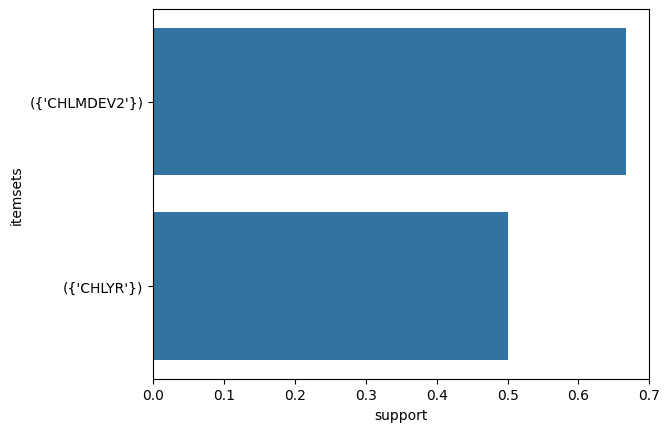

In [414]:
chl_features = comp_df[['CHLEV', 'CHLYR', 'CHLMDEV2', 'CHLMDNW2', 'PAINLB']]
chl_features = chl_features[chl_features['CHLEV'] == 1].drop('CHLEV', axis=1)
clean_chl_features = clean_df(chl_features)
freq_anlys(clean_chl_features)

Of those adults who experienced lower back pain for a period of at least 3 months and had been told they had hypertension, 90% where ever prescribed medice for high blood pressure, 90% ever had hypertenstion on 2+ visits, 80% were now taking prescribed medicine for high blood pressure, and 78% had hypertension, past 12 months. Of those adults who experienced lower back pain for a period of at least 3 months and had been told they had high cholesterol, 77% where ever prescribed medice to lower cholesterol, 75% had high cholesterol past 12 months, 67% were now taking prescribed medicine to lower cholesterol. Of those who had been told they had hypertension or lower cholesterol, they were within 1 and 2 standard deviations of the reviewed parameters for chronic affliction.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 957 entries, 6 to 26729
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ALTIME9  957 non-null    float64
 1   PAINLB   957 non-null    float64
dtypes: float64(2)
memory usage: 22.4+ KB
0.6302083333333334
-0.002013742813706809


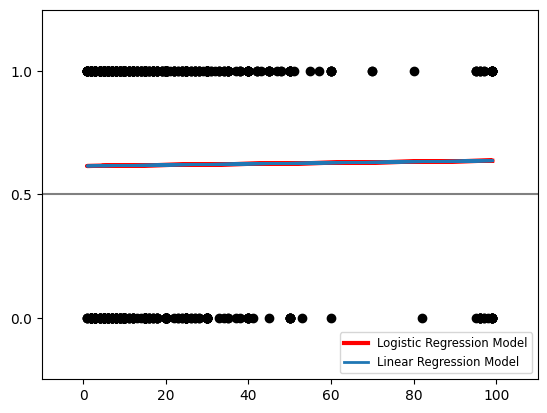

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 24 to 26656
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ALTIME18  1015 non-null   float64
 1   PAINLB    1015 non-null   float64
dtypes: float64(2)
memory usage: 23.8+ KB
0.4975369458128079
-0.02004889089177797


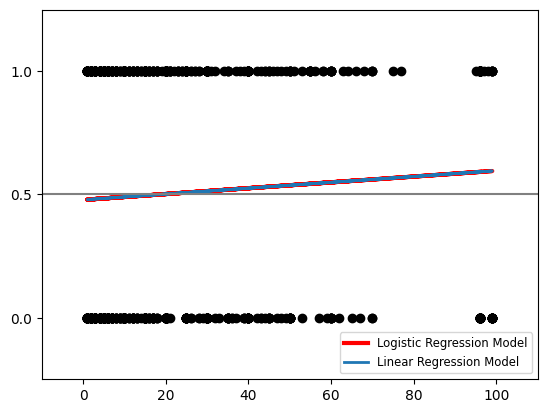

In [415]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from scipy.special import expit

num_features = comp_df[['ALTIME9', 'ALTIME18', 'PAINLB']]

def lin_log_test(feature):
  X = num_features[feature]
  y = num_features['PAINLB']
  y = y.replace({2: 0, 9: np.NaN})
  hyp_df = pd.concat([X,y], axis=1)
  hyp_df = hyp_df.dropna()
  hyp_df.info()
  X = hyp_df[feature]
  y = hyp_df['PAINLB']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  X_train = X_train.values.reshape(-1, 1)
  X_test = X_test.values.reshape(-1, 1)

  logreg = LogisticRegression(random_state=0)
  logreg.fit(X_train, y_train)
  print(logreg.score(X_test, y_test))
  plt.clf()
  plt.scatter(X.ravel(), y, color="black", zorder=20)
  loss = expit(X_test * logreg.coef_ + logreg.intercept_).ravel()
  plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

  linreg = LinearRegression()
  linreg.fit(X_train, y_train)
  print(linreg.score(X_test, y_test))
  plt.plot(X_test, linreg.coef_ * X_test + linreg.intercept_, label="Linear Regression Model", linewidth=2)
  plt.axhline(0.5, color=".5")

  plt.xlim(-10, 110)
  plt.yticks([0, 0.5, 1])
  plt.ylim(-0.25, 1.25)
  plt.legend(loc="lower right", fontsize="small")
  plt.show()

lin_log_test('ALTIME9')
lin_log_test('ALTIME18')

A logistic regretion and linear regression model where ran to determine any relationship between experiencing lower back pain and the duration of hypertension or high blood pressure and the duration of weight problem. 957 surverys were used for this analsys. No model was able to display a correlation between the specified features and lower back pain. This is to say that though lower back pain and hypertension or high blood pressure may be comorbid, there appears to be no relationship between them.

## Data

I explored this further, using surveys collected by The National Center for Health Statistics. Samples were collect from adults over varying demographics from 2016-2018 inorder to collect a review of overall health. 81,617 different surveys were collected for 1142 varying features. Further details as to variable documentation can be found at https://www.cdc.gov/nchs/nhis/data-questionnaires-documentation.htm.

## References

Work Cited

Aasa, Björn, et al. “Individualized low-load motor control exercises and education versus a
high-load lifting exercise and education to improve activity, pain intensity, and physical
performance in patients with low back pain: A randomized controlled trial.” Journal of
Orthopaedic &amp; Sports Physical Therapy, vol. 45, no. 2, Feb. 2015, pp. 77–85,
https://doi.org/10.2519/jospt.2015.5021.

“Apriori Algorithm.” Wikipedia, Wikimedia Foundation, 27 Feb. 2024, en.wikipedia.org/wiki/Apriori_algorithm.

Chou, Louisa, et al. “The association between obesity and low back pain and disability is
affected by mood disorders.” Medicine, vol. 95, no. 15, Apr. 2016, =
https://doi.org/10.1097/md.0000000000003367.

Cunningham, Erin, et al. “The relationships between physical activity, lumbar multifidus muscle
morphology, and low back pain from childhood to early adulthood: A 12-year
longitudinal study.” Scientific Reports, vol. 12, no. 1, 25 May 2022,
https://doi.org/10.1038/s41598-022-12674-8.

De Luca, Katie, et al. “Spinal pain, chronic health conditions and Health Behaviors: Data from
the 2016–2018 National Health Interview Survey.” International Journal of
Environmental Research and Public Health, vol. 20, no. 7, 3 Apr. 2023, p. 5369,
https://doi.org/10.3390/ijerph20075369.

D’hooge, Roseline, et al. “Increased intramuscular fatty infiltration without differences in lumbar
muscle cross-sectional area during remission of unilateral recurrent low back pain.”
Manual Therapy, vol. 17, no. 6, Dec. 2012, pp. 584–588,
https://doi.org/10.1016/j.math.2012.06.007.

Grabovac, Igor, and Thomas Ernst Dorner. “Association between low back pain and various
everyday performances.” Wiener Klinische Wochenschrift, vol. 131, no. 21–22, 6 Sept.
2019, pp. 541–549, https://doi.org/10.1007/s00508-019-01542-7.

Lee, Choung Ah, et al. “The relationship between change of weight and chronic low back pain in
population over 50 years of age: A nationwide cross-sectional study.” International
Journal of Environmental Research and Public Health, vol. 18, no. 8, 9 Apr. 2021, p.
3969, https://doi.org/10.3390/ijerph18083969.

Paungmali, Aatit, et al. “Improvements in tissue blood flow and Lumbopelvic stability after
lumbopelvic core stabilization training in patients with chronic non-specific low back
pain.” Journal of Physical Therapy Science, vol. 28, no. 2, 29 Feb. 2016, pp. 635–640,
https://doi.org/10.1589/jpts.28.635.

National Center for Health Statistics. “National Health Interview Survey.” National Center for Health Statistics, 2016-2018, Accessed 21 Apr. 2024.

Shemshaki, Hamidreza, et al. “What is the source of low back pain?” Journal of Craniovertebral
Junction and Spine, vol. 4, no. 1, Jan. 2013, p. 21,
https://doi.org/10.4103/0974-8237.121620.

Welch, N., et al. “The effects of a free-weight-based resistance training intervention on pain,
squat biomechanics and MRI-defined lumbar fat infiltration and functional
cross-sectional area in those with chronic low back.” BMJ Open Sport &amp; Exercise
Medicine, vol. 1, no. 1, 9 Nov. 2015, https://doi.org/10.1136/bmjsem-2015-000050.
